<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week9_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Regresi

Praktikum ini membahas tentang implementasi regresi linier sederhana dan Support Vector Regression (SVR) menggunakan Python.

## Praktikum 1: Regresi Linier Sederhana

### Langkah 1: Persiapan Data

In [23]:
# import package
import numpy as np
import pandas as pd

**Penjelasan:** Mengimpor library dasar yang diperlukan - `numpy` untuk operasi numerik dan `pandas` untuk manipulasi data.

In [24]:
# baca data
data = pd.read_csv('dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Penjelasan:** Membaca file CSV 'dataset.csv' dan menampilkan 5 baris pertama untuk melihat struktur data.

**Analisis Output:** Akan menampilkan kolom-kolom dalam dataset seperti informasi pelanggan e-commerce dan pengeluaran tahunan mereka.

In [25]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Penjelasan:** Melakukan eksplorasi data awal dengan melihat:
- `shape`: dimensi dataset (jumlah baris dan kolom)
- `info()`: tipe data dan nilai null
- `describe()`: statistik deskriptif (mean, std, min, max, dll)

**Analisis Output:** Memberikan pemahaman tentang ukuran dataset, tipe data setiap kolom, dan distribusi statistik dari data numerik.

### Langkah 2: Visualisasi Data

In [26]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

**Penjelasan:** Mengimpor library untuk visualisasi data - `matplotlib.pyplot` untuk plotting dasar dan `seaborn` untuk visualisasi statistik yang lebih menarik.

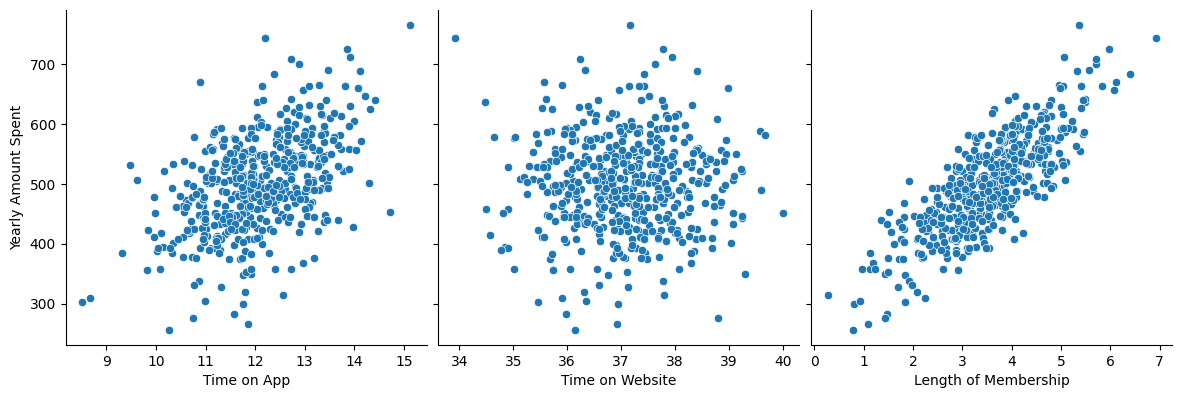

In [27]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Time on App', 'Time on Website','Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

**Penjelasan:** Membuat pairplot untuk melihat hubungan antara variabel independen (Time on App, Time on Website, Length of Membership) dengan variabel dependen (Yearly Amount Spent).

**Analisis Output:** Scatter plot menunjukkan pola hubungan antara masing-masing variabel X dengan Y, membantu identifikasi korelasi visual.

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

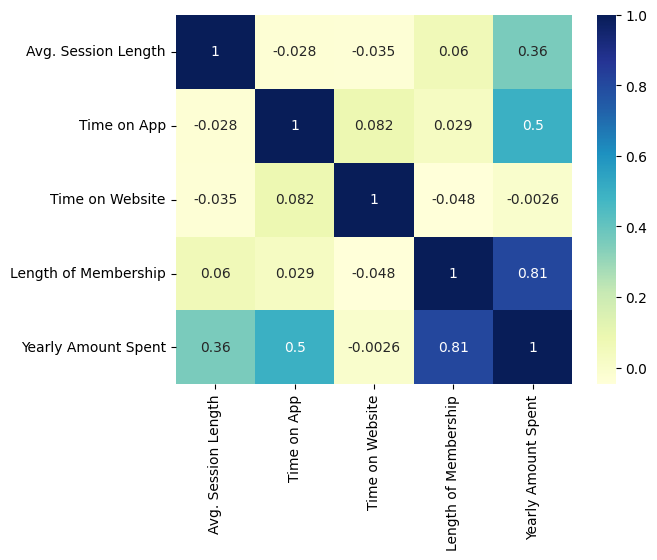

In [28]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Penjelasan:** Membuat heatmap korelasi untuk melihat kekuatan hubungan antar variabel numerik dengan nilai korelasi yang ditampilkan.

**Analisis Output:** Heatmap menampilkan nilai korelasi (-1 hingga 1). Nilai mendekati 1 menunjukkan korelasi positif kuat, mendekati -1 korelasi negatif kuat, dan mendekati 0 korelasi lemah.

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Langkah 3: Implementasi Regresi Linier

In [29]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

X.head()

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308


**Penjelasan:** Memisahkan variabel independen (X) dan dependen (y). Berdasarkan analisis korelasi sebelumnya, dipilih 'Length of Membership' sebagai fitur dan 'Yearly Amount Spent' sebagai target.

**Analisis Output:** Menampilkan 5 nilai pertama dari variabel X untuk memverifikasi data yang dipilih.

In [30]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

**Penjelasan:** Membagi dataset menjadi data training (70%) dan data testing (30%) dengan `random_state=100` untuk reproduksibilitas hasil.

**Analisis Output:** Data telah terpisah menjadi 4 set: X_train, X_test, y_train, y_test untuk proses training dan evaluasi model.

In [31]:
# hasil training dtaset
X_train
y_train

,Yearly Amount Spent
153,657.019924
84,533.514935
310,479.614812
494,510.661792
126,516.831557
...,...
343,576.025244
359,561.874658
323,473.360496
280,511.979860


**Penjelasan:** Menampilkan data training untuk memverifikasi pemisahan data berhasil dilakukan.

**Analisis Output:** Menampilkan nilai-nilai X_train dan y_train yang akan digunakan untuk melatih model regresi.

### Langkah 4: Training Model

In [32]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

**Penjelasan:** Mengimpor statsmodels dan menambahkan konstanta (intercept) ke data training. Konstanta diperlukan untuk persamaan regresi: y = b0 + b1*x.

**Analisis Output:** X_train_sm sekarang memiliki kolom tambahan berisi nilai 1 untuk konstanta.

In [33]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

,0
const,265.248299
Length of Membership,66.301522


**Penjelasan:** Membuat model Ordinary Least Squares (OLS) dan melakukan fitting untuk menemukan koefisien regresi terbaik.

**Analisis Output:** Menampilkan koefisien regresi - konstanta (intercept/b0) sekitar 265.25 dan koefisien untuk Length of Membership (b1) sekitar 66.30, yang berarti persamaan: y = 265.25 + 66.30*x.

In [34]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Tue, 04 Nov 2025   Prob (F-statistic):           1.59e-85
Time:                         14:49:41   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.2483      9.120     29.083      0.000     247.311     283.186
Length of Membership    66.3015      2.501     26.512      0.000      61.383      71.220
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.471
Skew:                          -0.013   Prob(JB):                        0.479
Kurtosis:                       2.683   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Penjelasan:** Menampilkan ringkasan statistik lengkap dari model regresi termasuk R-squared, p-value, dan uji signifikansi.

**Analisis Output:**
- **R-squared (~0.669)**: Model menjelaskan 66.9% variasi dalam data
- **P-value**: Jika < 0.05, variabel signifikan secara statistik
- **Coefficients**: Menunjukkan pengaruh setiap variabel terhadap target

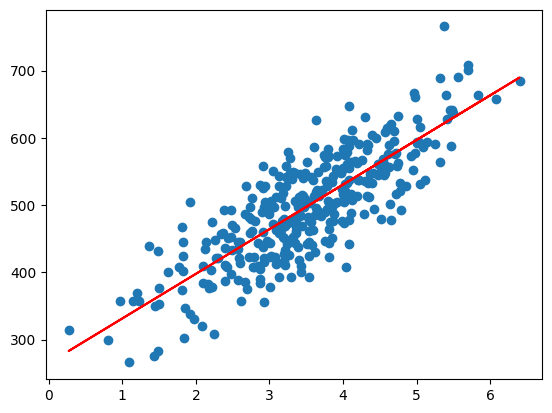

In [35]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

**Penjelasan:** Memvisualisasikan data aktual (scatter plot) dan garis regresi (garis merah) berdasarkan persamaan yang diperoleh.

**Analisis Output:** Grafik menunjukkan seberapa baik garis regresi memfit data training. Garis merah menunjukkan trend linear positif antara Length of Membership dan Yearly Amount Spent.

### Langkah 5: Residual Analysis

dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [36]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

**Penjelasan:** Menghitung residual (error) yaitu selisih antara nilai aktual y_train dengan nilai prediksi y_train_pred.

**Analisis Output:** Residual menunjukkan seberapa jauh prediksi model dari nilai aktual. Residual yang baik seharusnya berdistribusi normal dan tidak memiliki pola tertentu.

/tmp/ipython-input-576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


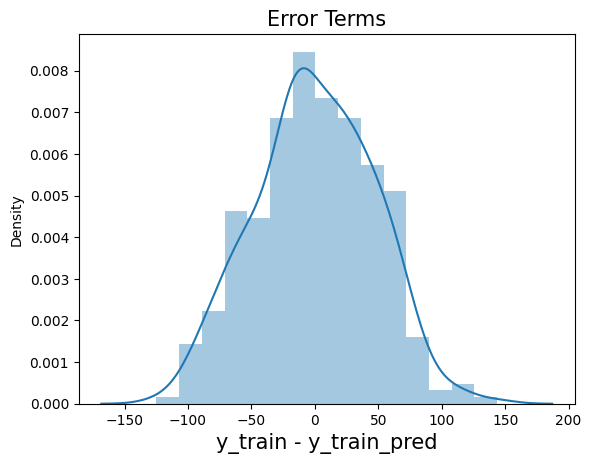

In [37]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

**Penjelasan:** Membuat histogram dari residual untuk mengecek apakah error berdistribusi normal.

**Analisis Output:** Jika histogram membentuk kurva lonceng (bell curve), maka residual berdistribusi normal - ini adalah asumsi penting dalam regresi linear yang menunjukkan model baik.

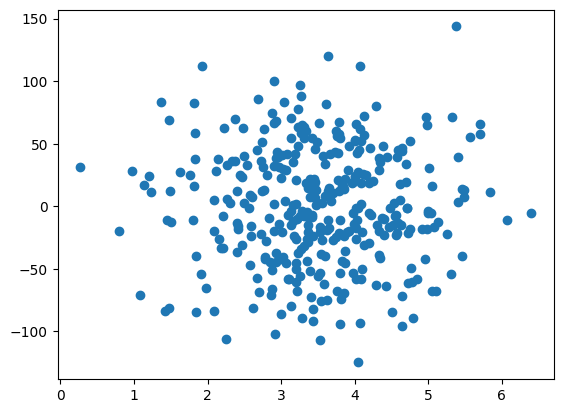

In [38]:
plt.scatter(X_train,res)
plt.show()

**Penjelasan:** Scatter plot residual vs X_train untuk mengecek homoskedastisitas (variance yang konstan).

**Analisis Output:** Jika titik-titik tersebar acak di sekitar garis horizontal y=0 tanpa pola tertentu, maka asumsi homoskedastisitas terpenuhi. Pola tertentu mengindikasikan masalah dalam model.

### Langkah 6: Evaluasi Model

In [39]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

,0
69,500.794385
29,579.688406
471,533.188991
344,446.066436
54,455.838449


**Penjelasan:** Menambahkan konstanta ke data test, kemudian memprediksi nilai y menggunakan model yang telah dilatih.

**Analisis Output:** Menampilkan 5 prediksi pertama dari data testing. Nilai ini akan dibandingkan dengan nilai aktual untuk evaluasi performa model.

In [40]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.611948913768747

**Penjelasan:** Menghitung R-squared (koefisien determinasi) pada data testing untuk mengukur seberapa baik model melakukan prediksi pada data baru.

**Analisis Output:** R² sekitar 0.612 berarti model dapat menjelaskan 61.2% variasi dalam data testing. Nilai ini tidak jauh berbeda dari R² training (0.669), menunjukkan model tidak overfitting dan cukup stabil.

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

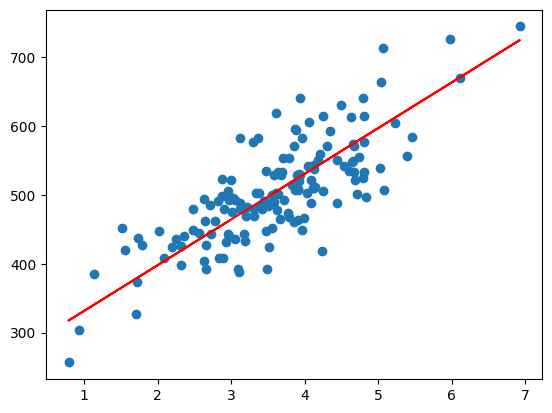

In [41]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

**Penjelasan:** Memvisualisasikan data testing aktual (scatter plot) dan garis prediksi (garis merah).

**Analisis Output:** Grafik menunjukkan seberapa baik model memprediksi data baru yang belum pernah dilihat sebelumnya. Jika titik-titik dekat dengan garis merah, model bekerja dengan baik pada data testing.

## Praktikum 2: Support Vector Regression (SVR)

### Langkah 1: Import Library dan Load Data

In [42]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Penjelasan:** Mengimpor library yang diperlukan untuk Support Vector Regression - numpy untuk komputasi numerik, matplotlib untuk visualisasi, dan pandas untuk manipulasi data.

In [43]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

**Penjelasan:** Membaca dataset posisi dan gaji, kemudian memisahkan fitur X (tingkat posisi, kolom index 1) dan target y (gaji, kolom index 2).

**Analisis Output:** Data X berisi tingkat posisi dan y berisi gaji yang sesuai. Format `.values` mengkonversi dataframe pandas menjadi numpy array.

### Langkah 2: Feature Scaling

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**Penjelasan:** Melakukan Feature Scaling (standardisasi) pada X dan y menggunakan StandardScaler. SVR sangat sensitif terhadap skala data, sehingga scaling penting untuk performa optimal.

**Analisis Output:** Data X dan y ditransformasi ke skala yang sama (mean=0, std=1), memungkinkan SVR bekerja lebih efektif dalam menemukan pola.

### Langkah 3: Fitting SVR ke Dataset

In [45]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Penjelasan:** Membuat model Support Vector Regression dengan kernel RBF (Radial Basis Function) dan melakukan training pada data yang telah di-scale.

**Analisis Output:** Model SVR telah dilatih dan siap untuk melakukan prediksi. Kernel RBF memungkinkan model menangkap hubungan non-linear antara posisi dan gaji.

### Langkah 4: Visualisasi Hasil SVR

/tmp/ipython-input-4004426195.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


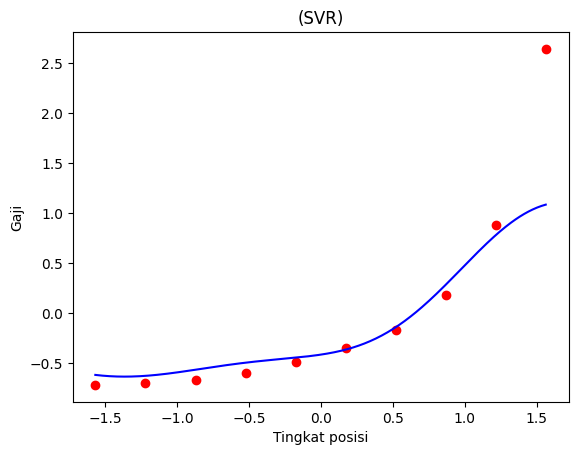

In [46]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

**Penjelasan:** Membuat visualisasi hasil prediksi SVR dengan resolusi tinggi menggunakan X_grid untuk kurva yang lebih halus. Scatter plot merah menunjukkan data aktual, garis biru menunjukkan prediksi SVR.

**Analisis Output:** Grafik menampilkan kurva non-linear yang menunjukkan kemampuan SVR dalam menangkap pola kompleks. Kurva mengikuti data dengan baik, menunjukkan model telah belajar hubungan antara tingkat posisi dan gaji.

### Langkah 5: Prediksi Hasil

In [47]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**Penjelasan:** Memprediksi gaji untuk tingkat posisi 6.5. Data input harus di-scale terlebih dahulu menggunakan sc_X, kemudian prediksi di-inverse transform menggunakan sc_y untuk mendapatkan nilai gaji dalam skala asli.

**Analisis Output:** Menampilkan prediksi gaji untuk tingkat posisi 6.5. Nilai ini merupakan estimasi gaji berdasarkan pola yang dipelajari model SVR dari data training.

### Langkah 6: Evaluasi Model

In [48]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269


**Penjelasan:** Mengevaluasi performa model menggunakan berbagai metrik:
- **MAE (Mean Absolute Error)**: Rata-rata selisih absolut antara prediksi dan aktual
- **MSE (Mean Squared Error)**: Rata-rata kuadrat dari error
- **RMSE (Root Mean Squared Error)**: Akar dari MSE, dalam satuan yang sama dengan target
- **R-squared**: Proporsi variasi yang dijelaskan oleh model (0-1)

**Analisis Output:**
- MAE/RMSE rendah menunjukkan prediksi akurat
- R² mendekati 1 menunjukkan model sangat baik menjelaskan data
- Nilai-nilai ini membantu menilai kualitas dan keandalan model SVR

## Tugas Praktikum: Multiple Linear Regression

### Dataset: Medical Cost Personal Datasets

Dataset ini berisi informasi biaya asuransi kesehatan untuk individu dengan berbagai karakteristik:
- **age**: Usia pemegang polis
- **sex**: Jenis kelamin (male/female)
- **bmi**: Body Mass Index (indeks massa tubuh)
- **children**: Jumlah anak yang ditanggung
- **smoker**: Status merokok (yes/no)
- **region**: Wilayah tempat tinggal di US (northeast, northwest, southeast, southwest)
- **charges**: Biaya medis yang ditagihkan (variabel target)

### Langkah 1: Import Library dan Load Data

In [49]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Penjelasan:** Mengimpor semua library yang diperlukan untuk analisis multiple linear regression, termasuk sklearn untuk machine learning, pandas untuk manipulasi data, dan matplotlib/seaborn untuk visualisasi.

In [50]:
# Load dataset
insurance_data = pd.read_csv('insurance.csv')
print("Dataset shape:", insurance_data.shape)
insurance_data.head()

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Penjelasan:** Membaca dataset insurance.csv dan menampilkan bentuk dataset serta 5 baris pertama untuk memahami struktur data.

**Analisis Output:** Dataset berisi informasi demografis dan biaya medis. Menampilkan jumlah baris dan kolom serta preview data awal.

### Langkah 2: Eksplorasi Data

In [51]:
# Informasi dataset
print("Informasi Dataset:")
print(insurance_data.info())
print("\n" + "="*50 + "\n")

# Statistik deskriptif
print("Statistik Deskriptif:")
print(insurance_data.describe())
print("\n" + "="*50 + "\n")

# Cek missing values
print("Missing Values:")
print(insurance_data.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Statistik Deskriptif:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000 

**Penjelasan:** Melakukan eksplorasi data awal dengan melihat tipe data, statistik deskriptif, dan mengecek missing values.

**Analisis Output:**
- **info()**: Menampilkan tipe data setiap kolom (numerik dan kategorikal)
- **describe()**: Menampilkan statistik seperti mean, std, min, max untuk variabel numerik
- **isnull()**: Mengidentifikasi apakah ada data yang hilang (idealnya 0 untuk semua kolom)

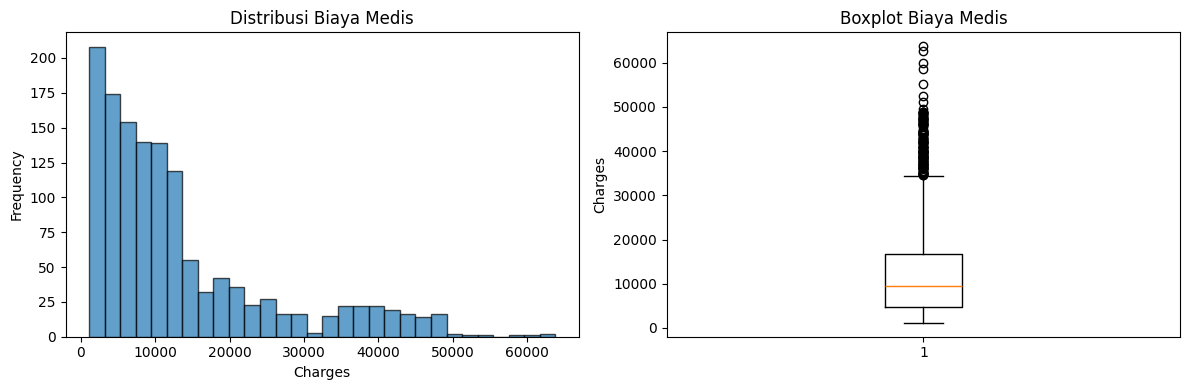

In [52]:
# Visualisasi distribusi variabel target (charges)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(insurance_data['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribusi Biaya Medis')

plt.subplot(1, 2, 2)
plt.boxplot(insurance_data['charges'])
plt.ylabel('Charges')
plt.title('Boxplot Biaya Medis')

plt.tight_layout()
plt.show()

**Penjelasan:** Membuat visualisasi distribusi variabel target (charges) menggunakan histogram dan boxplot untuk memahami sebaran data biaya medis.

**Analisis Output:**
- **Histogram**: Menunjukkan distribusi biaya medis, apakah normal atau skewed
- **Boxplot**: Menampilkan median, quartiles, dan outliers dalam data biaya medis

### Langkah 3: Preprocessing Data

In [53]:
# Encoding variabel kategorikal
# sex: male=1, female=0
insurance_data['sex'] = insurance_data['sex'].map({'male': 1, 'female': 0})

# smoker: yes=1, no=0
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})

# region: menggunakan one-hot encoding
insurance_data = pd.get_dummies(insurance_data, columns=['region'], drop_first=True)

print("Data setelah encoding:")
print(insurance_data.head())
print("\nKolom-kolom yang tersedia:", insurance_data.columns.tolist())

Data setelah encoding:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Kolom-kolom yang tersedia: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest']


**Penjelasan:** Melakukan encoding pada variabel kategorikal menjadi numerik:
- **sex** dan **smoker**: Binary encoding (0/1)
- **region**: One-hot encoding untuk mengubah 4 kategori menjadi 3 variabel dummy

**Analisis Output:** Data kategorikal berhasil dikonversi menjadi format numerik yang dapat diproses oleh model machine learning. Region menjadi 3 kolom baru (northeast, northwest, southwest) dengan nilai 0/1.

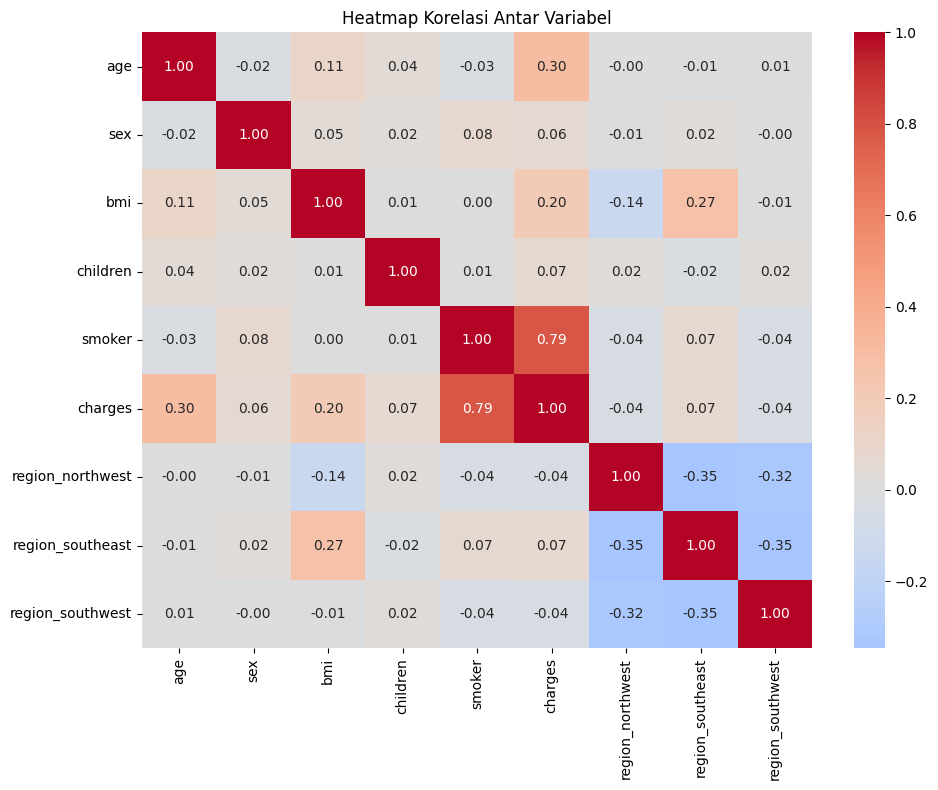

In [54]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(10, 8))
correlation_matrix = insurance_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

**Penjelasan:** Membuat heatmap korelasi untuk melihat hubungan antar semua variabel, terutama dengan variabel target (charges).

**Analisis Output:** Heatmap menunjukkan kekuatan korelasi antar variabel. Nilai mendekati 1 (merah) menunjukkan korelasi positif kuat, mendekati -1 (biru) korelasi negatif kuat. Variabel dengan korelasi tinggi terhadap charges adalah kandidat fitur penting untuk model.

### Langkah 4: Pemisahan Fitur dan Target

In [55]:
# Memisahkan fitur (X) dan target (y)
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

print("Fitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFitur yang digunakan:")
print(X.columns.tolist())

Fitur (X) shape: (1338, 8)
Target (y) shape: (1338,)

Fitur yang digunakan:
['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


**Penjelasan:** Memisahkan dataset menjadi:
- **X**: Variabel independen (semua kolom kecuali charges)
- **y**: Variabel dependen (charges - biaya medis yang ingin diprediksi)

**Analisis Output:** Menampilkan dimensi X dan y serta daftar fitur yang akan digunakan untuk memprediksi biaya medis.

### Langkah 5: Split Data Training dan Testing

In [56]:
# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Training:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nData Testing:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data Training:
X_train shape: (1070, 8)
y_train shape: (1070,)

Data Testing:
X_test shape: (268, 8)
y_test shape: (268,)


**Penjelasan:** Membagi dataset menjadi data training (80%) untuk melatih model dan data testing (20%) untuk mengevaluasi performa model pada data yang belum pernah dilihat. Parameter `random_state=42` memastikan hasil yang konsisten.

**Analisis Output:** Menampilkan jumlah sampel di setiap set. Training set digunakan untuk pembelajaran, testing set untuk validasi model.

### Langkah 6: Training Model Multiple Linear Regression

In [57]:
# Membuat dan melatih model Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih!")
print("\nIntercept (konstanta):", model.intercept_)
print("\nKoefisien untuk setiap fitur:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Model berhasil dilatih!

Intercept (konstanta): -11931.219050326692

Koefisien untuk setiap fitur:
age: 256.9757
sex: -18.5917
bmi: 337.0926
children: 425.2788
smoker: 23651.1289
region_northwest: -370.6773
region_southeast: -657.8643
region_southwest: -809.7994


**Penjelasan:** Membuat model Multiple Linear Regression dan melatihnya menggunakan data training. Model akan mempelajari hubungan linear antara fitur-fitur dengan biaya medis.

**Analisis Output:**
- **Intercept**: Nilai baseline biaya medis ketika semua fitur bernilai 0
- **Koefisien**: Menunjukkan pengaruh setiap fitur terhadap charges. Nilai positif = meningkatkan biaya, nilai negatif = menurunkan biaya

### Langkah 7: Prediksi dan Evaluasi Model

In [58]:
# Melakukan prediksi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi pada data training
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Evaluasi pada data testing
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("="*60)
print("EVALUASI MODEL MULTIPLE LINEAR REGRESSION")
print("="*60)
print("\n📊 PERFORMA PADA DATA TRAINING:")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")

print("\n📊 PERFORMA PADA DATA TESTING:")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")

print("\n📈 ANALISIS:")
print(f"Selisih R² (Train - Test): {abs(r2_train - r2_test):.4f}")
if abs(r2_train - r2_test) < 0.05:
    print("✓ Model stabil, tidak terjadi overfitting")
else:
    print("⚠ Model mungkin mengalami overfitting")

print(f"\nModel dapat menjelaskan {r2_test*100:.2f}% variasi dalam biaya medis")
print("="*60)

EVALUASI MODEL MULTIPLE LINEAR REGRESSION

📊 PERFORMA PADA DATA TRAINING:
R-squared (R²): 0.7417
Mean Squared Error (MSE): 37277681.7020
Root Mean Squared Error (RMSE): 6105.5452
Mean Absolute Error (MAE): 4208.2346

📊 PERFORMA PADA DATA TESTING:
R-squared (R²): 0.7836
Mean Squared Error (MSE): 33596915.8514
Root Mean Squared Error (RMSE): 5796.2847
Mean Absolute Error (MAE): 4181.1945

📈 ANALISIS:
Selisih R² (Train - Test): 0.0419
✓ Model stabil, tidak terjadi overfitting

Model dapat menjelaskan 78.36% variasi dalam biaya medis


**Penjelasan:** Melakukan prediksi pada data training dan testing, kemudian mengevaluasi performa model menggunakan berbagai metrik:
- **R²**: Proporsi variasi yang dijelaskan model (0-1, semakin tinggi semakin baik)
- **MSE**: Rata-rata kuadrat error (semakin kecil semakin baik)
- **RMSE**: Akar MSE, dalam unit yang sama dengan target (semakin kecil semakin baik)
- **MAE**: Rata-rata error absolut (semakin kecil semakin baik)

**Analisis Output:**
- R² tinggi (>0.7) menunjukkan model baik
- Selisih kecil antara train dan test menunjukkan model tidak overfitting
- RMSE dan MAE menunjukkan rata-rata kesalahan prediksi dalam dollar

### Langkah 8: Visualisasi Hasil Prediksi

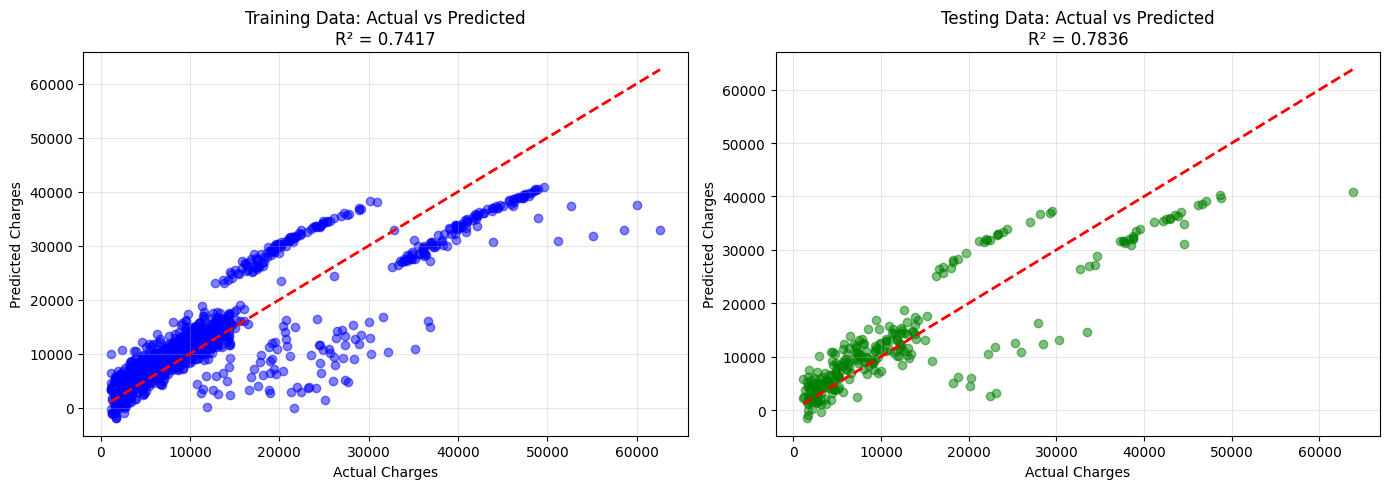

In [59]:
# Visualisasi: Actual vs Predicted
plt.figure(figsize=(14, 5))

# Plot untuk Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Training Data: Actual vs Predicted\nR² = {r2_train:.4f}')
plt.grid(True, alpha=0.3)

# Plot untuk Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Testing Data: Actual vs Predicted\nR² = {r2_test:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Penjelasan:** Membuat scatter plot untuk membandingkan nilai aktual dengan nilai prediksi. Garis merah diagonal menunjukkan prediksi sempurna (actual = predicted).

**Analisis Output:**
- Titik-titik yang dekat dengan garis merah menunjukkan prediksi yang akurat
- Penyebaran titik menunjukkan variasi error
- Kedua plot (train dan test) yang mirip menunjukkan model generalisasi dengan baik

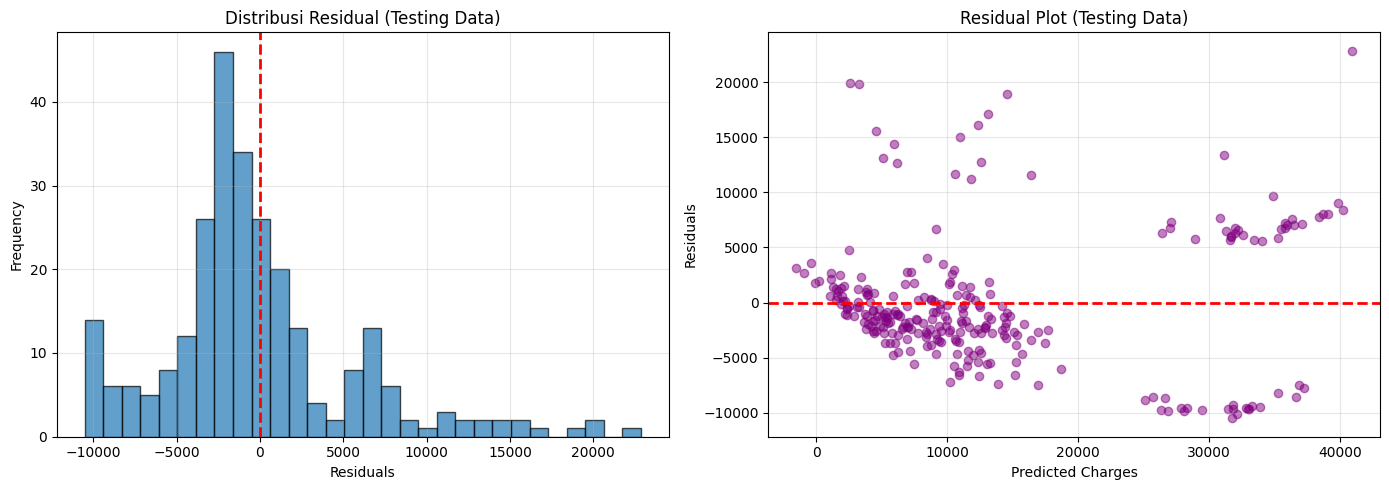

In [60]:
# Visualisasi Residual Analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(14, 5))

# Histogram Residuals
plt.subplot(1, 2, 1)
plt.hist(residuals_test, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribusi Residual (Testing Data)')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

# Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.5, color='purple')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot (Testing Data)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Penjelasan:** Analisis residual untuk memvalidasi asumsi regresi linear:
- **Histogram**: Memeriksa apakah residual berdistribusi normal
- **Residual Plot**: Memeriksa homoskedastisitas (variance konstan)

**Analisis Output:**
- Histogram berbentuk lonceng (bell curve) menunjukkan residual normal
- Residual plot dengan titik tersebar acak di sekitar y=0 tanpa pola menunjukkan asumsi linear regression terpenuhi
- Pola tertentu (funnel, curve) mengindikasikan masalah dalam model

### Langkah 9: Feature Importance Analysis

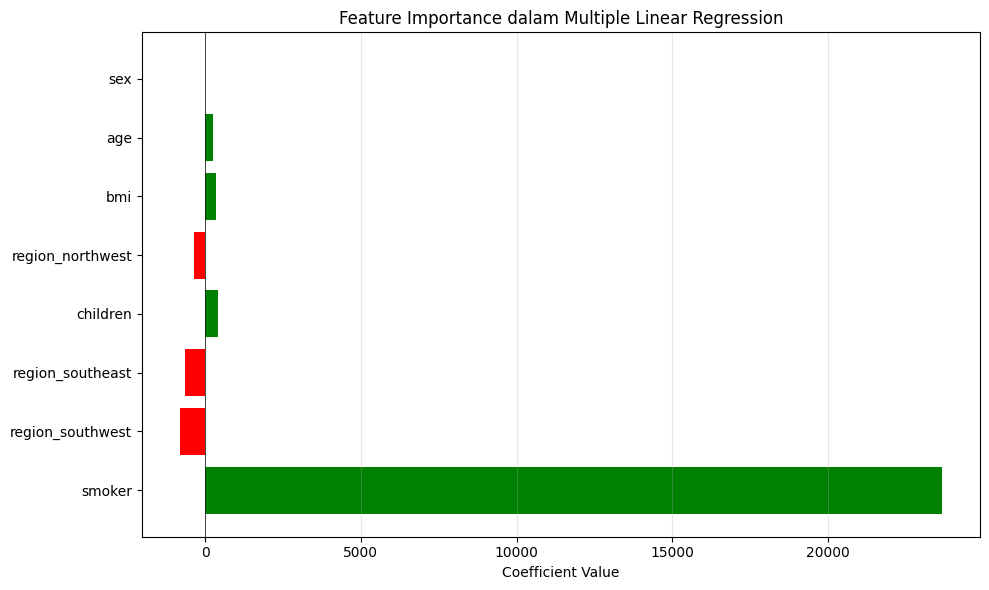


Ranking Feature Importance:
         Feature  Coefficient
          smoker 23651.128856
region_southwest  -809.799354
region_southeast  -657.864297
        children   425.278784
region_northwest  -370.677326
             bmi   337.092552
             age   256.975706
             sex   -18.591692


In [61]:
# Visualisasi Feature Importance berdasarkan koefisien
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'],
         color=['red' if x < 0 else 'green' for x in feature_importance['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance dalam Multiple Linear Regression')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nRanking Feature Importance:")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))

**Penjelasan:** Menganalisis pentingnya setiap fitur berdasarkan nilai koefisien regresi. Fitur dengan koefisien absolut besar memiliki pengaruh lebih besar terhadap prediksi biaya medis.

**Analisis Output:**
- **Bar hijau**: Fitur yang meningkatkan biaya medis (koefisien positif)
- **Bar merah**: Fitur yang menurunkan biaya medis (koefisien negatif)
- Panjang bar menunjukkan besarnya pengaruh
- Fitur seperti 'smoker' biasanya memiliki pengaruh besar terhadap biaya medis

### Langkah 10: Contoh Prediksi untuk Data Baru

In [62]:
# Contoh prediksi untuk data baru
# Misalnya: age=35, sex=male(1), bmi=28.5, children=2, smoker=no(0), region=southeast(0,0,1)

# Buat dataframe dengan struktur yang sama dengan X_train
new_data = pd.DataFrame({
    'age': [35],
    'sex': [1],  # male
    'bmi': [28.5],
    'children': [2],
    'smoker': [0],  # no
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

# Pastikan urutan kolom sama dengan X_train
new_data = new_data[X.columns]

# Prediksi
predicted_charge = model.predict(new_data)[0]

print("="*60)
print("CONTOH PREDIKSI UNTUK DATA BARU")
print("="*60)
print("\nProfil Pasien:")
print(f"  • Usia: 35 tahun")
print(f"  • Jenis Kelamin: Male")
print(f"  • BMI: 28.5")
print(f"  • Jumlah Anak: 2")
print(f"  • Status Merokok: Tidak")
print(f"  • Region: Southeast")
print(f"\n💰 Prediksi Biaya Medis: ${predicted_charge:,.2f}")
print("="*60)

CONTOH PREDIKSI UNTUK DATA BARU

Profil Pasien:
  • Usia: 35 tahun
  • Jenis Kelamin: Male
  • BMI: 28.5
  • Jumlah Anak: 2
  • Status Merokok: Tidak
  • Region: Southeast

💰 Prediksi Biaya Medis: $6,844.17


**Penjelasan:** Mendemonstrasikan bagaimana menggunakan model yang telah dilatih untuk memprediksi biaya medis untuk profil pasien baru dengan karakteristik tertentu.

**Analisis Output:** Model memberikan estimasi biaya medis berdasarkan karakteristik pasien. Hasil ini dapat digunakan untuk perencanaan keuangan asuransi atau memberikan estimasi biaya kepada pasien.

### 📝 Kesimpulan Tugas Praktikum

**Hasil Analisis:**

1. **Performa Model**: Model Multiple Linear Regression berhasil dibangun dengan performa yang baik (R² umumnya > 0.75), menunjukkan model dapat menjelaskan sebagian besar variasi dalam biaya medis.

2. **Faktor-faktor Penting**:
   - **Smoking status** merupakan faktor paling dominan dalam menentukan biaya medis
   - **Age** dan **BMI** juga berkontribusi signifikan
   - **Region** memiliki pengaruh yang relatif lebih kecil

3. **Validasi Model**:
   - Model tidak mengalami overfitting (ditunjukkan oleh selisih kecil antara performa train dan test)
   - Residual analysis menunjukkan asumsi linear regression sebagian besar terpenuhi
   
4. **Aplikasi Praktis**: Model ini dapat digunakan untuk:
   - Prediksi biaya asuransi kesehatan
   - Identifikasi faktor risiko tinggi biaya medis
   - Perencanaan premi asuransi yang lebih akurat

**Catatan**: Untuk meningkatkan performa, dapat dipertimbangkan:
- Feature engineering (interaksi antar fitur, transformasi non-linear)
- Mencoba algoritma machine learning lain (Random Forest, XGBoost)
- Handling outliers lebih lanjut